In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_test=pd.read_csv("dataset/testbase.csv")
df_train=pd.read_csv("dataset/trainbase.csv")

In [3]:
df_train.head()

id  creditlimit  n_cards  os_balance  os_billing  \
0  20210100001    7000000.0        2       36158     23437.0   
1  20210100002   10000000.0        2      268691    254564.0   
2  20210100003   28000000.0        3     6769149   4159779.0   
3  20210100004   21000000.0        4     3496732    111231.0   
4  20210100005   10000000.0        2     9402085   6099283.0   

   tot_cash_advance_trx  tot_retail_trx  remaining_unpaid_balance branchcode  \
0                   0.0            94.0                   26323.0          I   
1                   0.0          1012.0                       0.0          A   
2                   0.0             0.0                       0.0          A   
3                   0.0       2536660.0                  581334.0          G   
4                   0.0       2666558.0                 5951865.0          A   

   rasio_pembayaranpayment_ratio  ...  good_bad_flag  loan_tenure  total_trx  \
0                         102.19  ...              0    15.416667       94.0   
1                           0.00  ...              0     0.750000     1012.0   
2                         100.00  ...              0    10.750000        0.0   
3                         100.00  ...              0    19.750000  2536660.0   
4                          95.99  ...              0     1.666667  2666558.0   

   remaining_statement_balance_per_n_cards  \
0                                  13161.5   
1                                      0.0   
2                                      0.0   
3                                 145333.5   
4                                2975932.5   

   remaining_statement_balance_per_limit  total_trx_per_limit  \
0                               0.003760             0.000013   
1                               0.000000             0.000101   
2                               0.000000             0.000000   
3                               0.027683             0.120793   
4                               0.595186             0.266656   

   tot_trx_3months_per_limit  tot_trx_6months_per_limit  \
0                   0.011719                   0.017810   
1                   0.000000                   0.000000   
2                   0.040518                   0.047703   
3                   0.055971                   0.016851   
4                   0.323027                   0.131162   

   utilization_Rate_3months  utilization_Rate_6months  
0                  0.013228                  0.021949  
1                  0.004232                  0.000300  
2                  0.249389                  0.267853  
3                  0.101912                  0.346635  
4                  0.707865                  0.336571  

[5 rows x 24 columns]

In [4]:
df_train.drop(df_train.columns[0], inplace=True, axis=1)

In [5]:
print("Database has {} obserwations (customers) and {} columns (attributes).".format(df_train.shape[0],df_train.shape[1]))
print("Missing values in each column:\n{}".format(df_train.isnull().sum()))
print("Columns data types:\n{}".format(df_train.dtypes))

Database has 13170 obserwations (customers) and 23 columns (attributes).
Missing values in each column:
creditlimit                                 0
n_cards                                     0
os_balance                                  0
os_billing                                  0
tot_cash_advance_trx                        0
tot_retail_trx                              0
remaining_unpaid_balance                    0
branchcode                                 86
rasio_pembayaranpayment_ratio               0
overlimit_pct                               0
payment_ration_3months                      0
payment_ration_6months                      0
deliquncy_score                             0
good_bad_flag                               0
loan_tenure                                 0
total_trx                                   0
remaining_statement_balance_per_n_cards     0
remaining_statement_balance_per_limit       0
total_trx_per_limit                         0
tot_trx_3months_per_li

In [6]:
df_train['branchcode']=df_train['branchcode'].fillna(df_train['branchcode'].mode()[0])

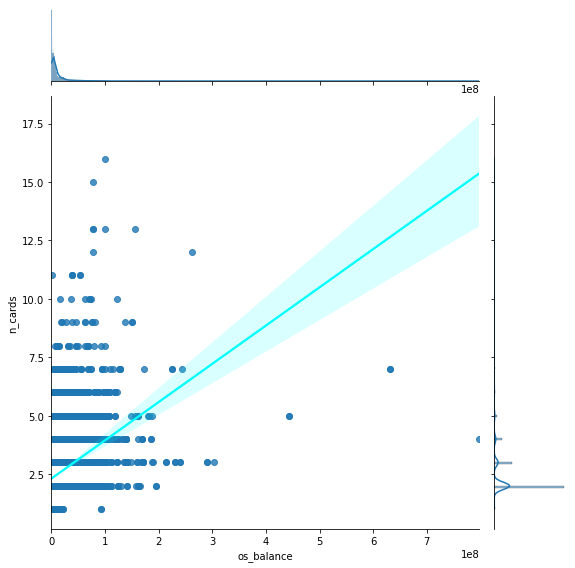

In [8]:
import scipy.stats as stats
r1 = sns.jointplot(x="os_balance",y="n_cards", data=df_train, kind="reg", height=8, joint_kws={'line_kws':{'color':'cyan'}})

plt.show()

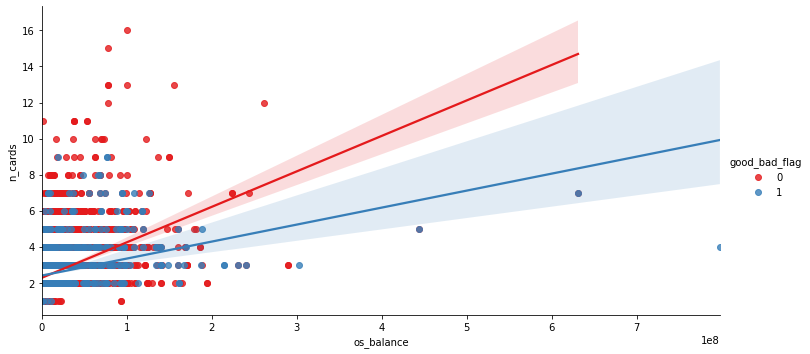

In [10]:
sns.lmplot(x="os_balance",y="n_cards", hue="good_bad_flag", data=df_train, palette="Set1", aspect=2)
plt.show()

In [11]:
df_train.branchcode = df_train.branchcode.replace({"A": 1, "B" : 2, "C" : 3, "D" : 4, "E" : 5, "F" : 6, "G" : 7, "H" : 8, "I" : 9,"K": 11, "J": 10})

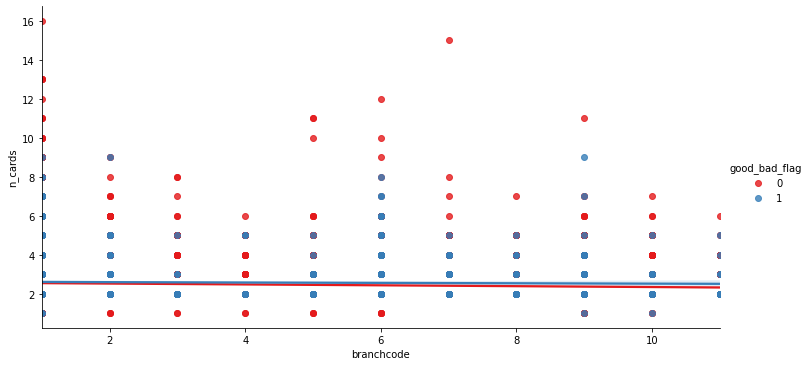

In [21]:
sns.lmplot(x="branchcode",y="n_cards", hue="good_bad_flag", data=df_train, palette="Set1", aspect=2)
plt.show()

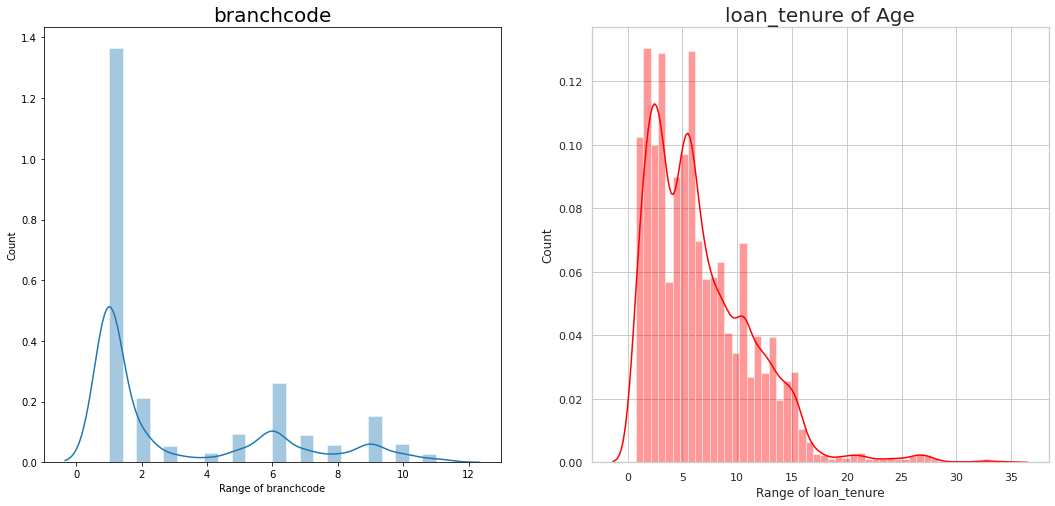

In [22]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(df_train['branchcode'])
plt.title('branchcode', fontsize = 20)
plt.xlabel('Range of branchcode')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(df_train['loan_tenure'], color = 'red')
plt.title('loan_tenure of Age', fontsize = 20)
plt.xlabel('Range of loan_tenure')
plt.ylabel('Count')
plt.show()

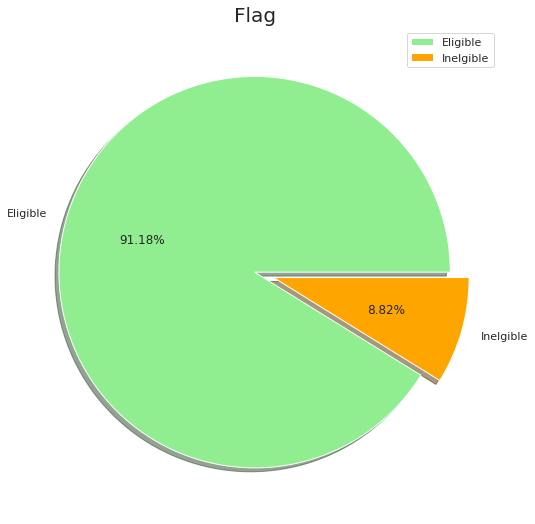

In [25]:
labels = ['Eligible', 'Inelgible']
size = df_train['good_bad_flag'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Flag', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [31]:
data = df_train.drop(['utilization_Rate_3months','utilization_Rate_6months','tot_trx_6months_per_limit','payment_ration_3months','payment_ration_6months','rasio_pembayaranpayment_ratio'],axis=1)


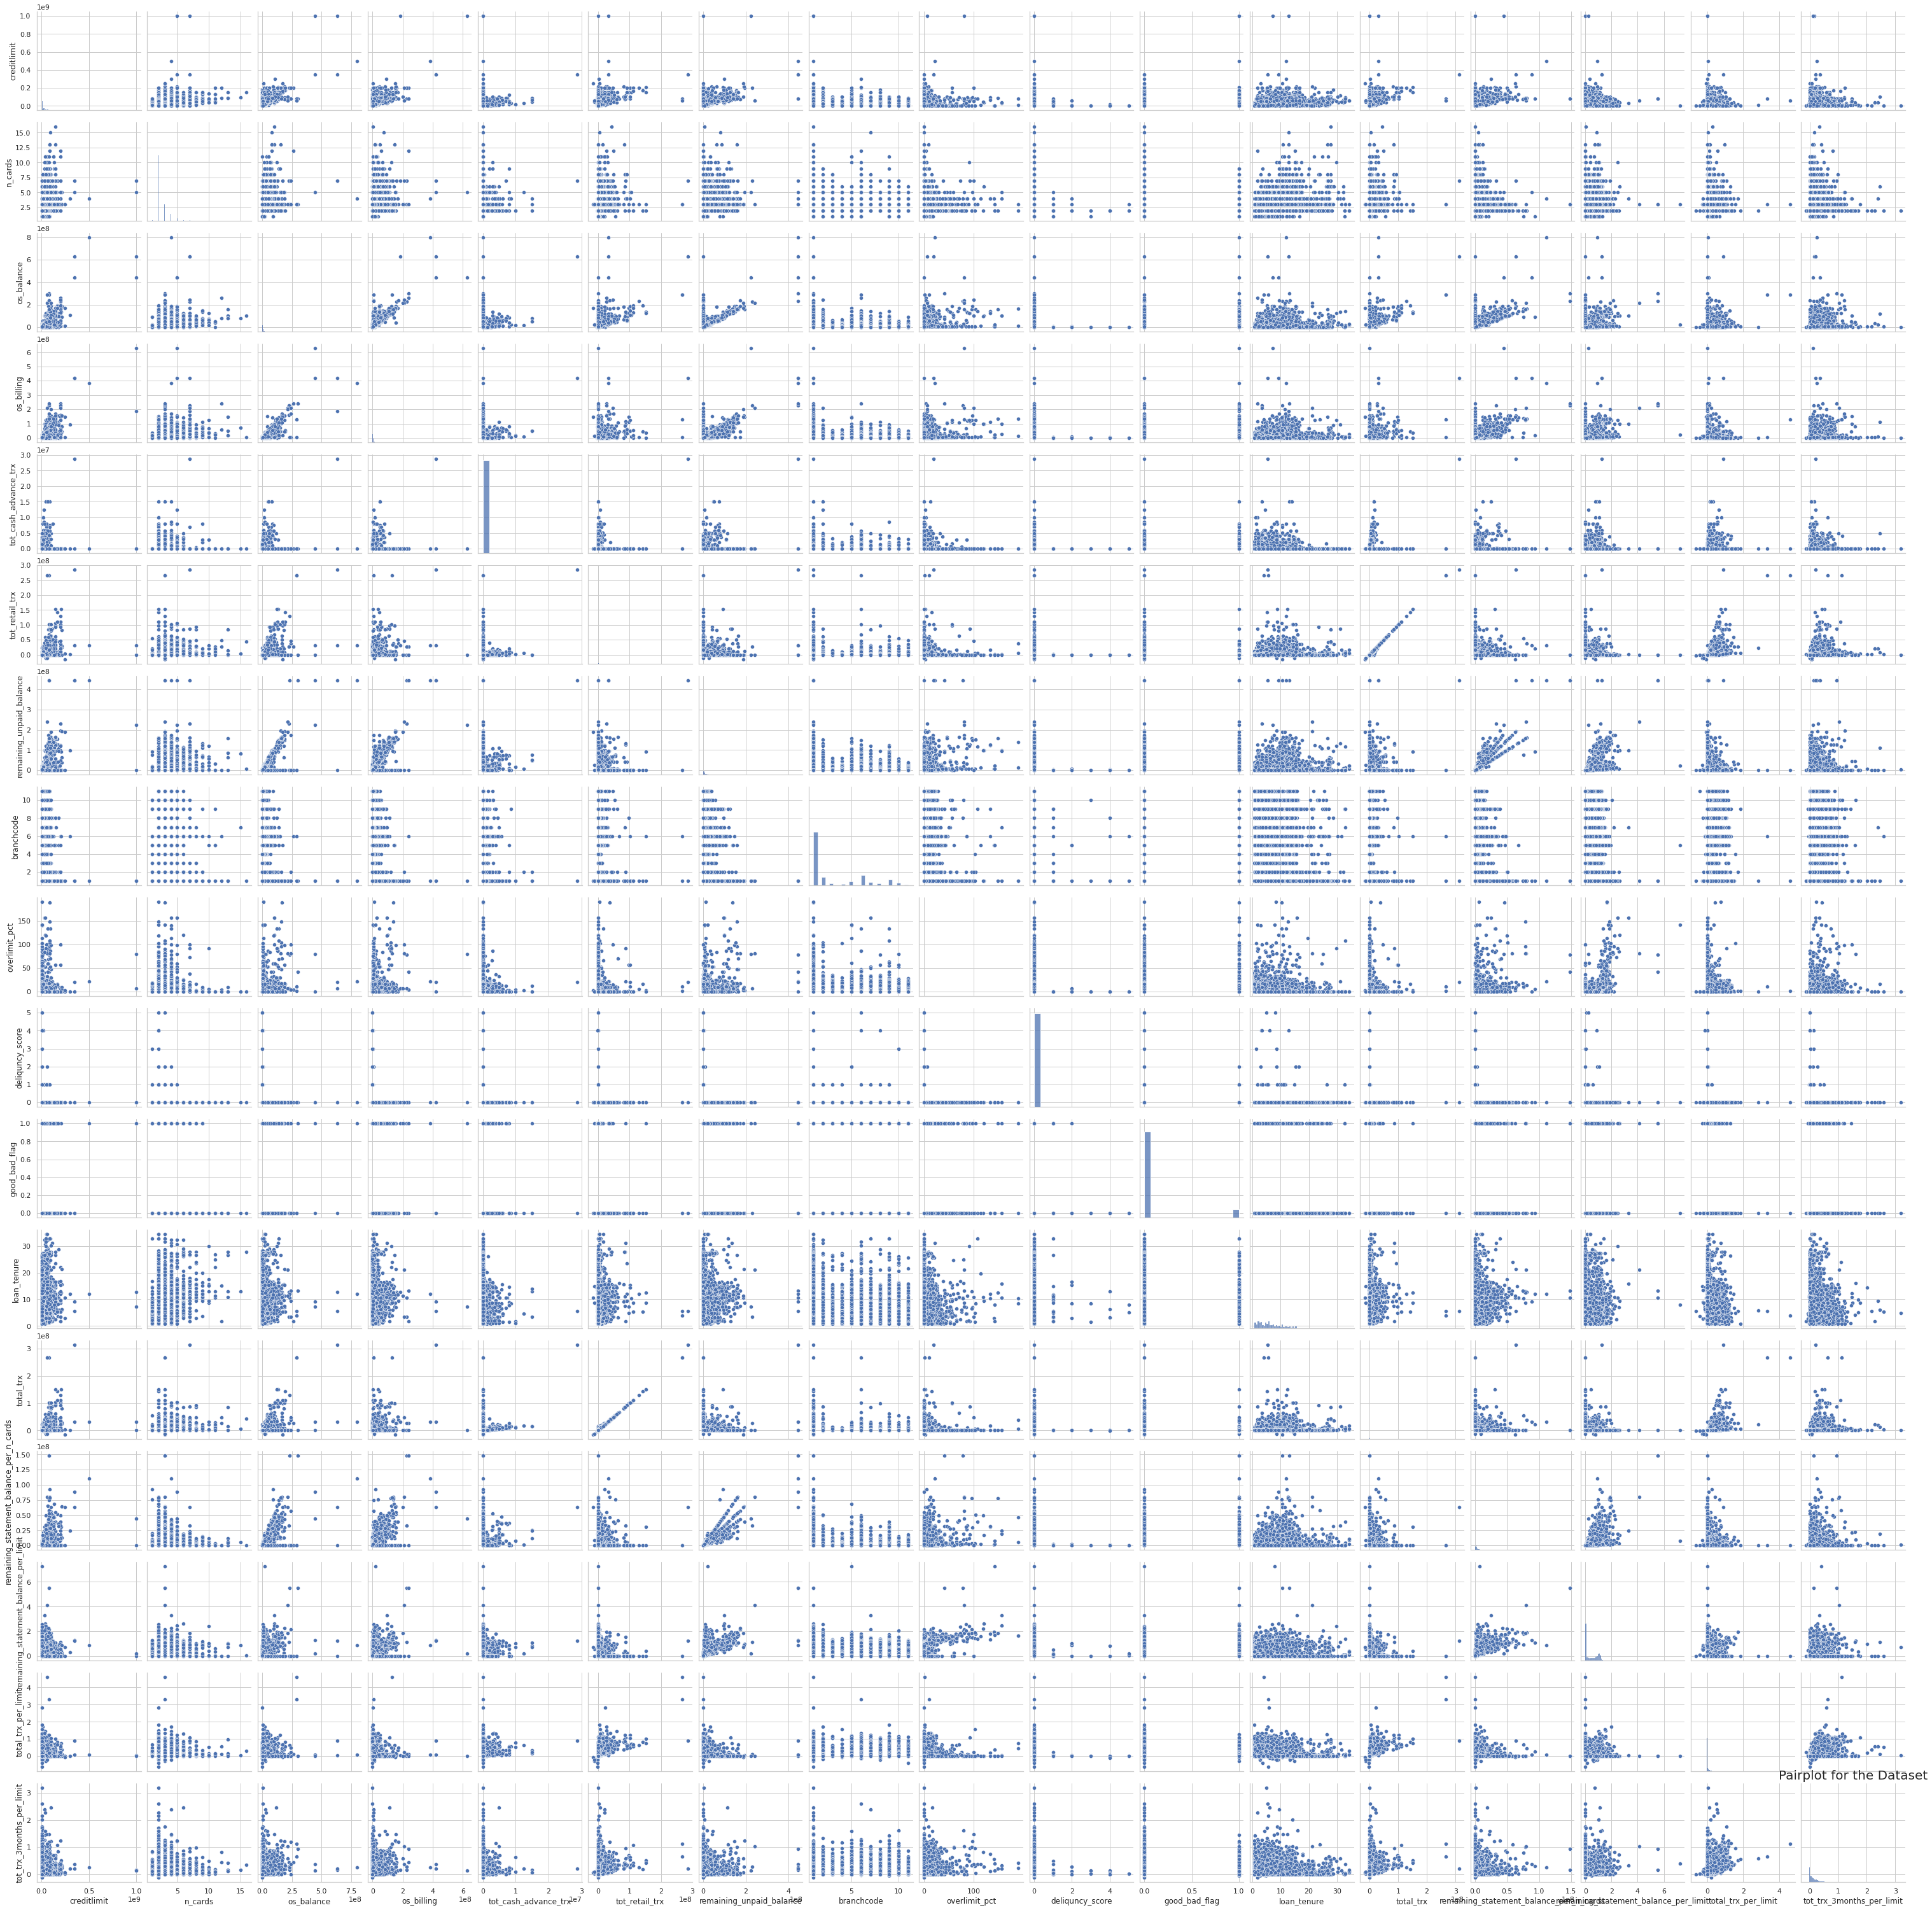

In [32]:
sns.pairplot(data)
plt.title('Pairplot for the Dataset', fontsize = 20)
plt.show()

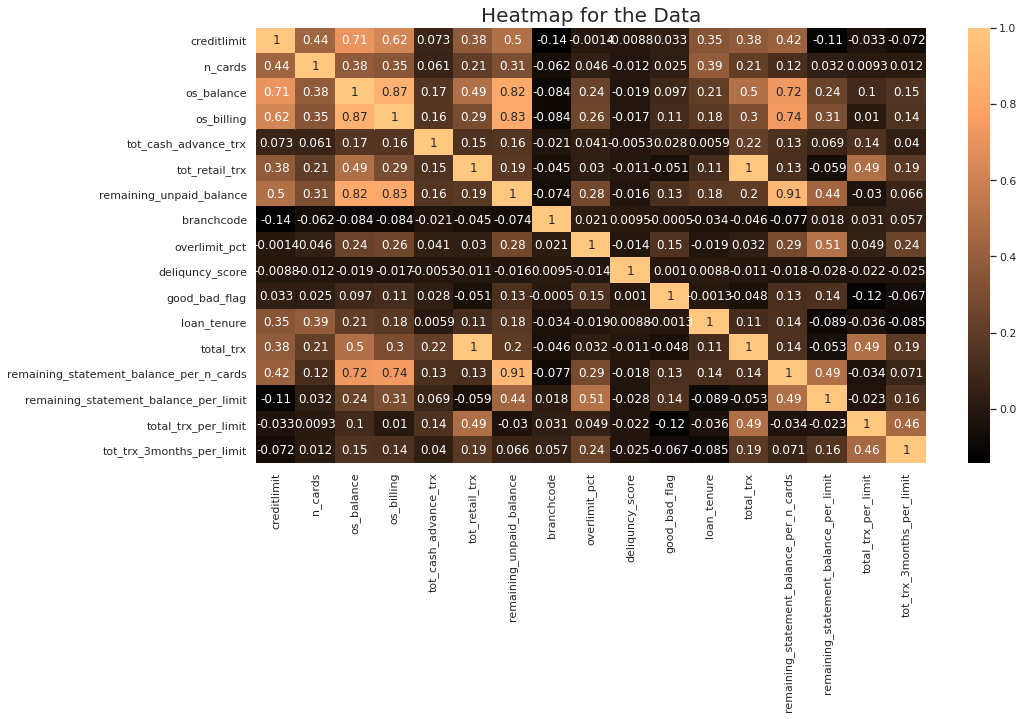

In [34]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(data.corr(), cmap = 'copper', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

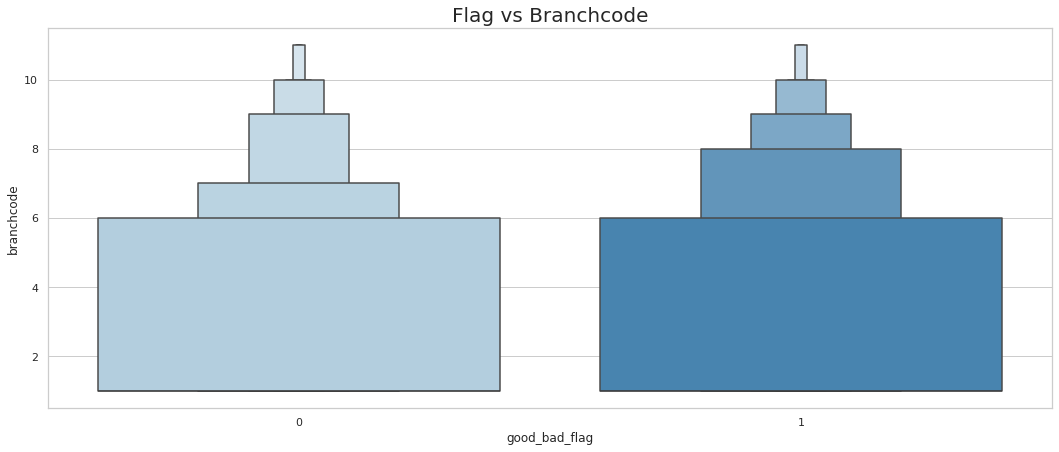

In [35]:
# Flags Vs Brance

plt.rcParams['figure.figsize'] = (18, 7)
sns.boxenplot(data['good_bad_flag'], data['branchcode'], palette = 'Blues')
plt.title('Flag vs Branchcode', fontsize = 20)
plt.show()

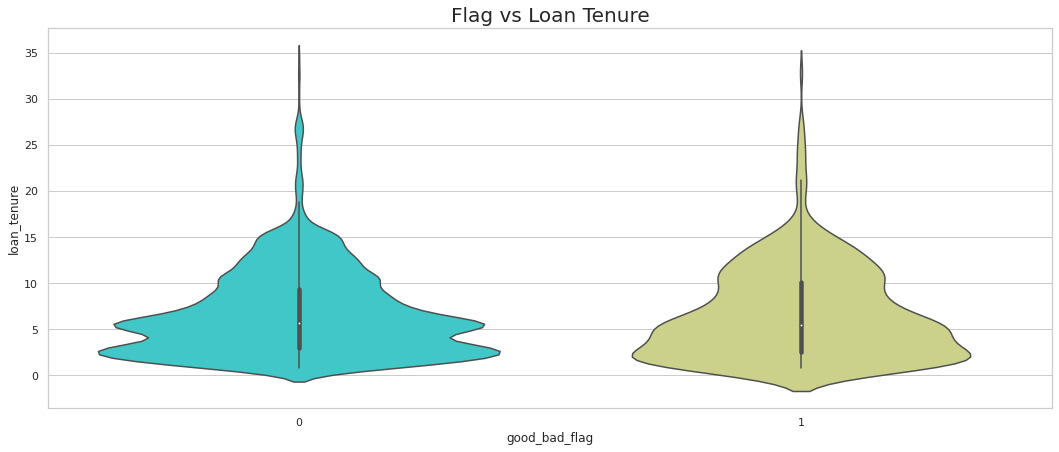

In [36]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.violinplot(data['good_bad_flag'], data['loan_tenure'], palette = 'rainbow')
plt.title('Flag vs Loan Tenure', fontsize = 20)
plt.show()

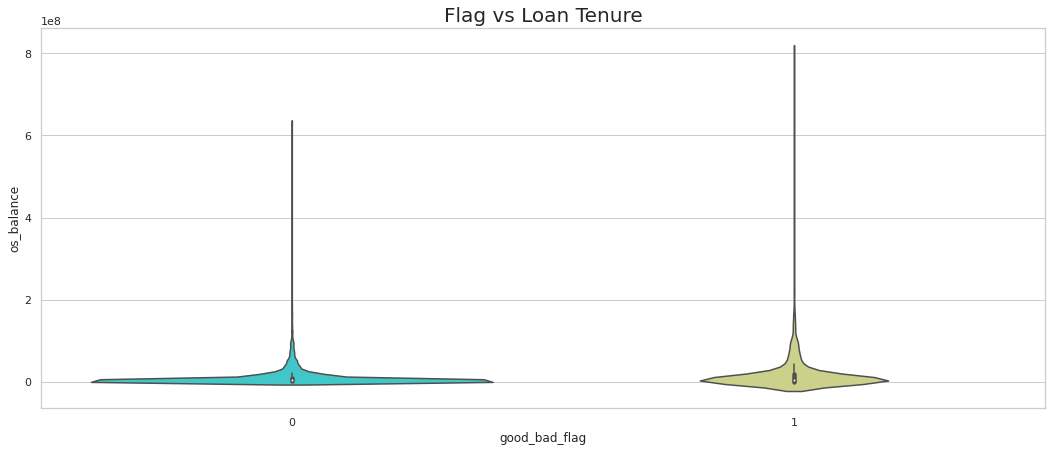

In [38]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.violinplot(data['good_bad_flag'], data['os_balance'], palette = 'rainbow')
plt.title('Flag vs Loan Tenure', fontsize = 20)
plt.show()

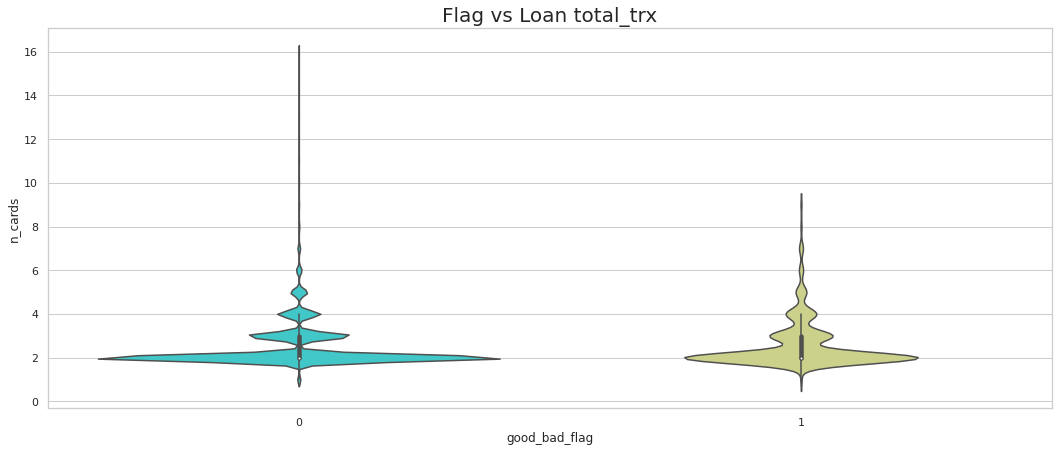

In [41]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.violinplot(data['good_bad_flag'], data['n_cards'], palette = 'rainbow')
plt.title('Flag vs Loan Number of Card', fontsize = 20)
plt.show()

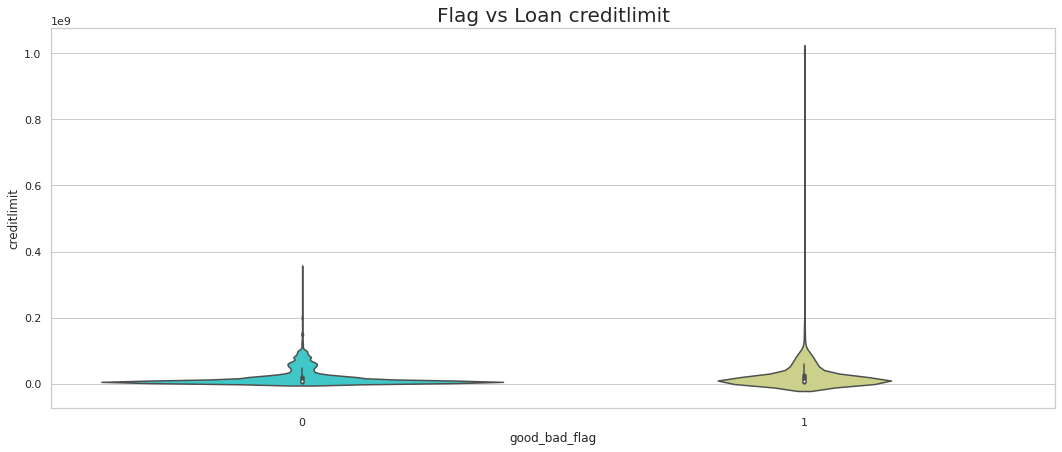

In [42]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.violinplot(data['good_bad_flag'], data['creditlimit'], palette = 'rainbow')
plt.title('Flag vs Loan creditlimit', fontsize = 20)
plt.show()

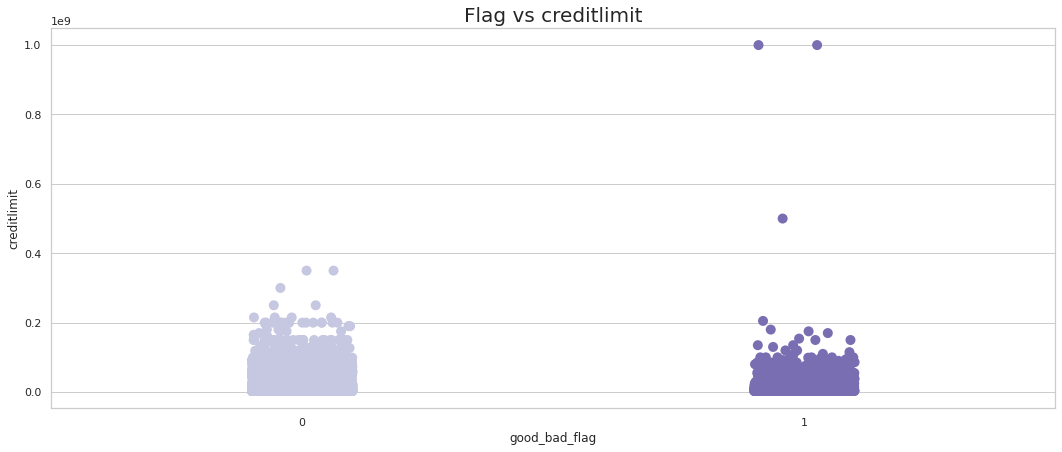

In [47]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.stripplot(data['good_bad_flag'], data['creditlimit'], palette = 'Purples', size = 10)
plt.title('Flag vs creditlimit', fontsize = 20)
plt.show()

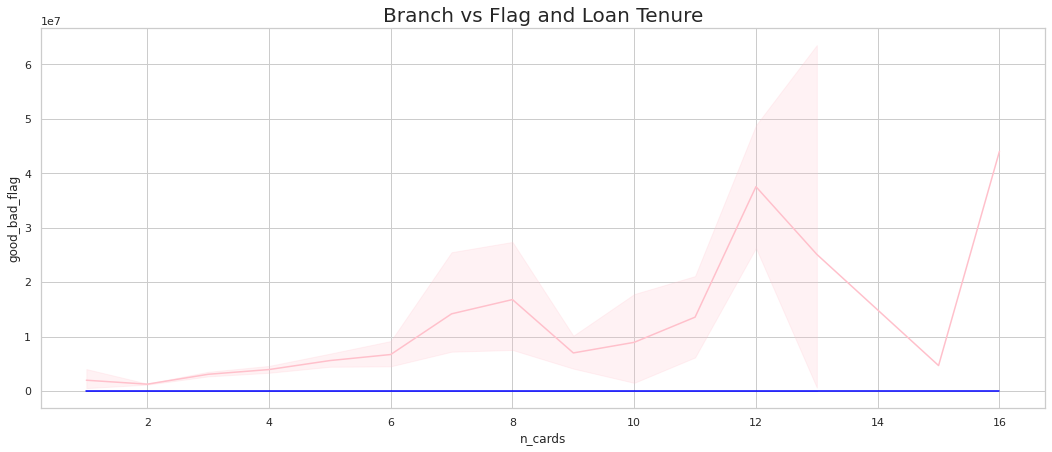

In [55]:
x = data['n_cards']
y = data['good_bad_flag']
z = data['total_trx']

sns.lineplot(x, y, color = 'blue')
sns.lineplot(x, z, color = 'pink')
plt.title('Branch vs Flag and Loan Tenure', fontsize = 20)
plt.show()

### Clustering Analysis

In [61]:
x = data.iloc[:, [2, 11]].values

# let's check the shape of x
print(x.shape)

(13170, 2)


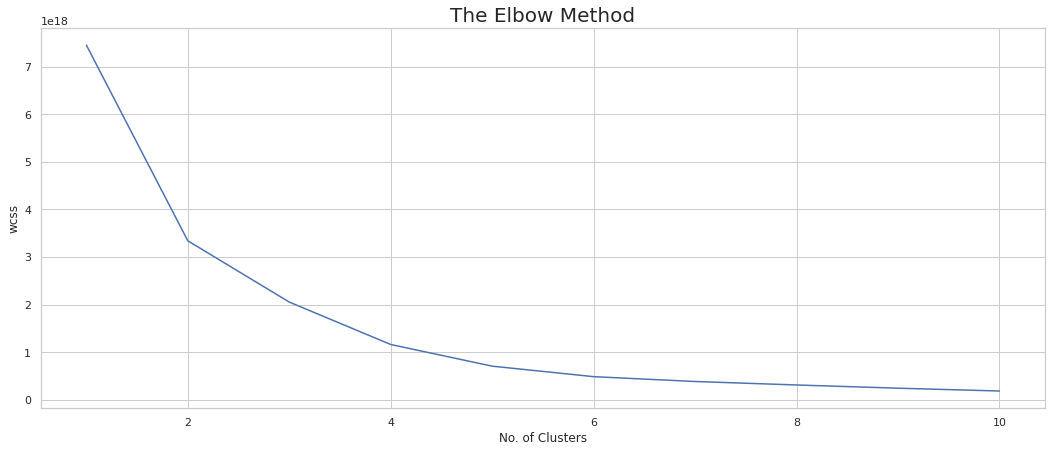

In [63]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

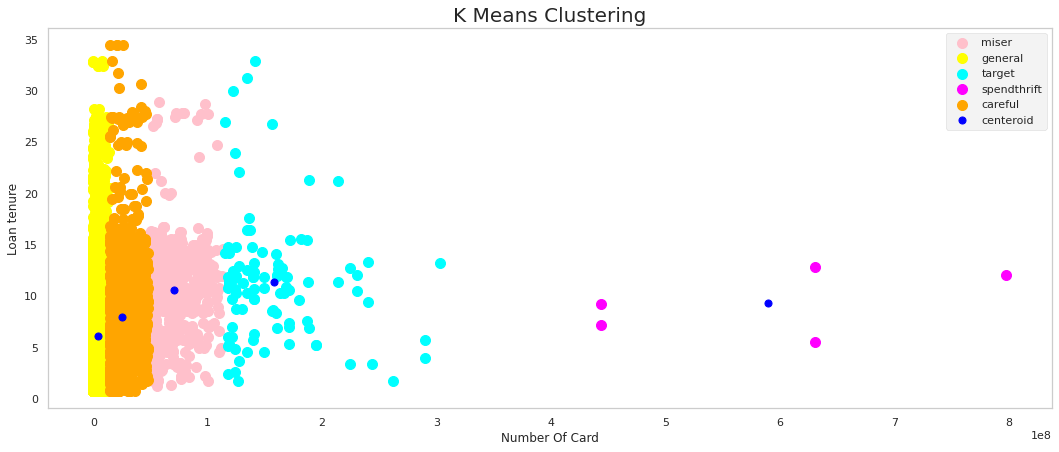

In [64]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Number Of Card')
plt.ylabel('Loan tenure')
plt.legend()
plt.grid()
plt.show()

In [65]:
data

creditlimit  n_cards  os_balance  os_billing  tot_cash_advance_trx  \
0        7000000.0        2       36158     23437.0                   0.0   
1       10000000.0        2      268691    254564.0                   0.0   
2       28000000.0        3     6769149   4159779.0                   0.0   
3       21000000.0        4     3496732    111231.0                   0.0   
4       10000000.0        2     9402085   6099283.0                   0.0   
...            ...      ...         ...         ...                   ...   
13165   20000000.0        2    20743090  20527879.0                   0.0   
13166   17000000.0        2     3855317   3160704.0                   0.0   
13167    6000000.0        2       62162     41120.0                   0.0   
13168    4000000.0        3      264597    252864.0                   0.0   
13169    5000000.0        2     4067271   3939921.0                   0.0   

       tot_retail_trx  remaining_unpaid_balance  branchcode  overlimit_pct  \
0                94.0                   26323.0           9           0.00   
1              1012.0                       0.0           1           0.00   
2                 0.0                       0.0           1           0.00   
3           2536660.0                  581334.0           7           0.00   
4           2666558.0                 5951865.0           1           0.00   
...               ...                       ...         ...            ...   
13165        295000.0                14769911.0           1           0.68   
13166        269998.0                       0.0           1           0.00   
13167           238.0                       0.0           1           0.00   
13168          1018.0                  246512.0           9           0.00   
13169             0.0                 4062413.0           6           0.00   

       deliquncy_score  good_bad_flag  loan_tenure  total_trx  \
0                    0              0    15.416667       94.0   
1                    0              0     0.750000     1012.0   
2                    0              0    10.750000        0.0   
3                    0              0    19.750000  2536660.0   
4                    0              0     1.666667  2666558.0   
...                ...            ...          ...        ...   
13165                0              0     1.000000   295000.0   
13166                0              0     9.330000   269998.0   
13167                0              0     2.000000      238.0   
13168                0              0     3.830000     1018.0   
13169                0              0     2.250000        0.0   

       remaining_statement_balance_per_n_cards  \
0                                      13161.5   
1                                          0.0   
2                                          0.0   
3                                     145333.5   
4                                    2975932.5   
...                                        ...   
13165                                7384956.0   
13166                                      0.0   
13167                                      0.0   
13168                                  82171.0   
13169                                2031207.0   

       remaining_statement_balance_per_limit  total_trx_per_limit  \
0                                   0.003760             0.000013   
1                                   0.000000             0.000101   
2                                   0.000000             0.000000   
3                                   0.027683             0.120793   
4                                   0.595186             0.266656   
...                                      ...                  ...   
13165                               0.738000             0.014700   
13166                               0.000000             0.015900   
13167                               0.000000             0.000040   
13168                               0.061600             0.000255   
1316

In [68]:
x = data.iloc[:, [2, 4]].values
x.shape

(13170, 2)

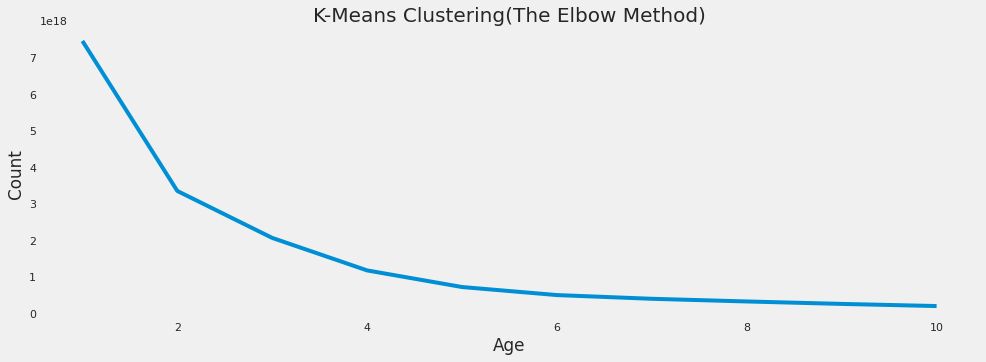

In [69]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (15, 5)
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('Flag')
plt.ylabel('Count')
plt.grid()
plt.show()

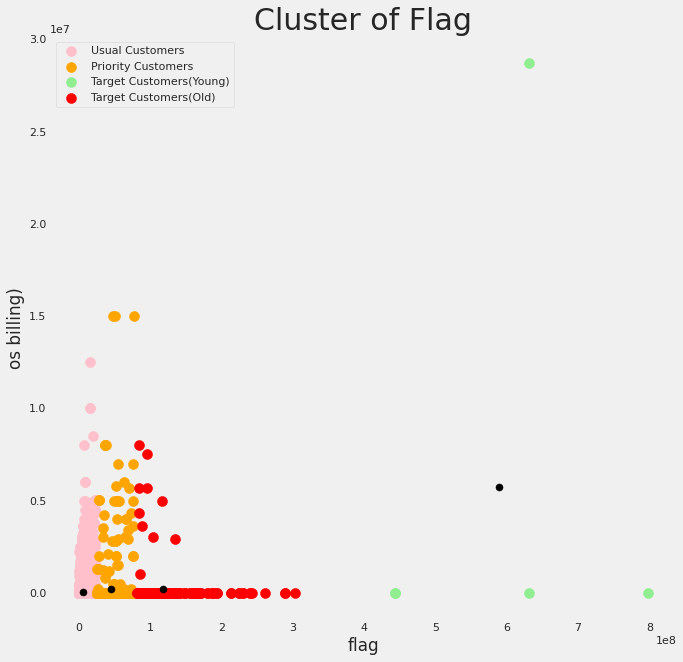

In [71]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Cluster of Flag', fontsize = 30)

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 100, c = 'pink', label = 'Usual Customers' )
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 100, c = 'orange', label = 'Priority Customers')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 100, c = 'lightgreen', label = 'Target Customers(Young)')
plt.scatter(x[ymeans == 3, 0], x[ymeans == 3, 1], s = 100, c = 'red', label = 'Target Customers(Old)')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black')

plt.style.use('fivethirtyeight')
plt.xlabel('flag')
plt.ylabel('os billing)')
plt.legend()
plt.grid()
plt.show()

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff


x = data[['good_bad_flag', 'n_cards', 'loan_tenure']].values
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
km.fit(x)
labels = km.labels_
centroids = km.cluster_centers_

In [80]:
data['labels'] =  labels
trace1 = go.Scatter3d(
    x= data['good_bad_flag'],
    y= data['n_cards'],
    z= data['loan_tenure'],
    mode='markers',
     marker=dict(
        color = data['labels'], 
        size= 10,
        line=dict(
            color= data['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
df = [trace1]

layout = go.Layout(
    title = 'FLAG vs nummber of card vs Loan holder or not',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'good_bad_flag'),
            yaxis = dict(title  = 'n_cards'),
            zaxis = dict(title  = 'loan_tenure')
        )
)

fig = go.Figure(data = df, layout = layout)
py.iplot(fig)